#Topic Modeling with LDA

##Dowloading and importing modules

In [1]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

!pip install emot
!pip install demoji
!pip install emoji
!pip install pyLDAvis
import emoji
import demoji
demoji.download_codes()

import json
import pandas as pd
import numpy as np
import regex as re
import pickle

import matplotlib.pyplot as plt
import seaborn as sns

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import TweetTokenizer

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

from gensim.models.wrappers import LdaMallet
from gensim.models import LdaModel
from gensim.models.coherencemodel import CoherenceModel
from pprint import pprint

import pyLDAvis
from pyLDAvis.gensim_models import prepare

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 61 kB 19 kB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 42 kB 1.1 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 197 kB 6.9 MB/s 
  Created wheel for emoji: filename=emoji-2.0.0-py3-none-any.whl size=193022 sha256=99f62af88bff0ce9532546d162901a732c52f487ea6fa192e34c9311ead14d83
  Stored in directory: /root/.cache/pip/wheels/ec/29/4d/3cfe7452ac7d8d83b1930f8a6205c3c9649b24e80f9029fc38
Successfully built emoji
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 7.8 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installi

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: The demoji.download_codes attribute is deprecated and will be removed from demoji in a future version. It is an unused attribute as emoji codes are now distributed directly with the demoji package.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Google credidentials

In [3]:
#Connnect to google drive 
from google.colab import drive
drive.mount('/content/gdrive')

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

Mounted at /content/gdrive


## Import modules

In [4]:
## Import librabries
import sys
import os

py_file_location = "/content/gdrive/MyDrive/NLP-exam"
sys.path.append(os.path.abspath(py_file_location))

import tweet_preprocessing as tp

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
/content/gdrive/MyDrive/NLP-exam/tweet_preprocessing.py:20: FutureWarning: The demoji.download_codes attribute is deprecated and will be removed from demoji in a future version. It is an unused attribute as emoji codes are now distributed directly with the demoji package.
  demoji.download_codes()


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
(105482, 6)
(107587, 6)
Original shape:(213069, 6)


/content/gdrive/MyDrive/NLP-exam/tweet_preprocessing.py:145: FutureWarning: The default value of regex will change from True to False in a future version.
  df.Tweet = df.Tweet.str.replace(regex_list[i], replace_list[i])


After cleaning tweets:(213069, 10)
After handling dulicates and nans:(78542, 10)


,Tweet,Date,User,Type,PostID,InclKey,Hashtags,User_tags,Linked_to,RT,Tokenized_tweets
5500,fact checking always biased misleading created...,2021-04-23,KidKool4U,status,1386384766665216001,plandemic,NaN,[@FelixtheAXE],NaN,True,"[fact, checking, always, biased, misleading, c..."
5501,nothing amorphous thing orchestrated happen re...,2021-04-23,georgemas0nn,status,1386383648254054400,plandemic,"[#amorphous, #orchestrated, #agenda, #organic]",[@WenMoonTho],NaN,True,"[nothing, amorphous, thing, orchestrated, happ..."
5502,gotta research vaccine mask entire,2021-04-23,PowerSoula,status,1386382883254853636,plandemic,[#Plandemic],"[@Kareim30184380, @CryptoMessiah]",NaN,False,"[gotta, research, vaccine, mask, entire]"
5503,bill gate practice genocide africa absorb vita...,2021-04-23,dsyunior,status,1386382415380180992,plandemic,"[#Africa, #Plandemic, #EndGame]",NaN,[https://t.co/oV2To6KrEn],False,"[bill, gate, practice, genocide, africa, absor..."
5504,garbage click bait piece torched else tired fa...,2021-04-23,NVPatriotGirl,status,1386381145135144962,plandemic,"[#ufc, #UFC261, #fakenewsmedia, #propaganda, #...","[@reviewjournal, @danawhite]",[https://t.co/ILLtYkbBXC],False,"[garbage, click, bait, piece, torched, else, t..."
5505,wonder many oscar take home tonight,2021-04-23,ethan_douglas,status,1386378505236135937,plandemic,NaN,NaN,[https://t.co/SEopHdINWX],False,"[wonder, many, oscar, take, home, tonight]"
5506,covid used take away people right freedom powe...,2021-04-23,NoConclusion79,status,1386378282707390464,plandemic,NaN,NaN,[https://t.co/2ksHRgprP9],False,"[covid, used, take, away, people, right, freed..."
5507,look proof worldwide scam year test sold world,2021-04-23,JAZZYW257,status,1386378169549209601,plandemic,NaN,NaN,[https://t.co/xmS000Mwjj],False,"[look, proof, worldwide, scam, year, test, sol..."
5508,family member daycare working month child snif...,2021-04-23,ganais_anais,status,1386377427019051014,plandemic,"[#SlipperySlope, #COVID19, #Plandemic]","[@markjam88463456, @existentialrest, @shocking...",NaN,False,"[family, member, daycare, working, month, chil..."
5509,hoax boris struggle sell longer,2021-04-23,Fifi_Borgia,status,1386377425358147584,plandemic,NaN,[@darylpeagram],NaN,True,"[hoax, boris, struggle, sell, longer]"


##Creating dataframe from files

In [5]:
#create plandemic and scamdemic list of subdirecvtories
b = "\'1WwYhT1PPii8x-O4GLnMm54E9DnMrcTED\'"
plandemic_subfolders = tp.matching_items_in_directory(b, 'plandemic')
scamdemic_subfolders = tp.matching_items_in_directory(b, 'scamdemic')

#clean and create dataset for each context
df_plandemic = tp.clean_combine_subfolder_tweets(plandemic_subfolders)
df_scamdemic = tp.clean_combine_subfolder_tweets(scamdemic_subfolders)

#separate dataframes
print(df_plandemic.shape)
print(df_scamdemic.shape)

#combined dataframes
df = pd.concat([df_plandemic, df_scamdemic], ignore_index=True)
display(df)

(105482, 6)
(107587, 6)


,Tweet,Date,User,Type,PostID,InclKey
0,RT @libertytarian: 1st day of pastor's trial f...,2021-04-30,SyrianArchangle,status,1390250830956318721,plandemic
1,RT @sjaanie123: Kijk uit voor de gevaccineerde...,2021-04-30,SaskiaDev,status,1390250693534097408,plandemic
2,@Bameron2 You’re boyfriend must be proud of yo...,2021-04-30,Phoenix1783,status,1390250538026086400,plandemic
3,Kijk uit voor de gevaccineerden mensen! #COVID...,2021-04-30,sjaanie123,status,1390249938118905856,plandemic
4,"RT @BartosVl: Covid inženýři z celého světa, j...",2021-04-30,Lubomr12663547,status,1390249162176974848,plandemic
...,...,...,...,...,...,...
213064,"RT @SJJB55: Sept 2020, sat in our village (pop...",2021-04-21,mherbert617,status,1384048634195431432,scamdemic
213065,@BhupinderJaryal This is ..scamdemic,2021-04-21,SharmaSandeep41,status,1384047994165628932,scamdemic
213066,"RT @SJJB55: Sept 2020, sat in our village (pop...",2021-04-21,louisrossilevy,status,1384047719354753025,scamdemic
213067,"Guess what , nobody's gonna get the money 🤣😂\n...",2021-04-21,DanielScoland,status,1384047365724663810,scamdemic


##Preprocessing

In [6]:
def preprocess_tweets(df):
  ''' Calling preprocessing steps to handle tweets before it is fed into model. '''
  df = tp.emojis_to_text(df)
  df = tp.extract_tweet_features(df)
  df = tp.clean_tweets(df)
  df = tp.concentrate_tweets(df)
  df = tp.tokenize_tweets(df)
  df = tp.handle_duplicates_nans(df)

  return df

df = preprocess_tweets(df)
df = df.reset_index()
display(df)

/content/gdrive/MyDrive/NLP-exam/tweet_preprocessing.py:145: FutureWarning: The default value of regex will change from True to False in a future version.
  df.Tweet = df.Tweet.str.replace(regex_list[i], replace_list[i])


,index,Tweet,Date,User,Type,PostID,InclKey,Hashtags,User_tags,Linked_to,RT,Tokenized_tweets
0,40,shop class high school shop teacher walked for...,2021-04-30,GingrichVera,status,1390227188851556353,plandemic,NaN,[@tr6_guy],NaN,False,"[shop, class, high, school, shop, teacher, wal..."
1,138,smell meltdown biblical proportion wind leftwa...,2021-04-30,Emm_Down_Under,status,1390186145410031616,plandemic,NaN,[@CailinGaeilge8],NaN,True,"[smell, meltdown, biblical, proportion, wind, ..."
2,141,guess bandwagon tweeps pushing something blame...,2021-04-30,NICHONASRl,status,1390185828236861440,plandemic,[#LifeBeforeCovid],[@njenga_richard],NaN,True,"[guess, bandwagon, tweeps, pushing, something,..."
3,162,herdachten huidige regeringsleiders gaan veel ...,2021-04-30,mirakelwolf,status,1390171838651715595,plandemic,NaN,[@kasleuk],NaN,True,"[herdachten, huidige, regeringsleiders, gaan, ..."
4,173,situation india single called spiritual master...,2021-04-30,koshe_suhas,status,1390161332872257539,plandemic,"[#plandemic, #Genocide]",[@jeffsekerak],NaN,False,"[situation, india, single, called, spiritual, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...
71609,213037,took shed truth rest politician combined achie...,2021-04-21,cryptoKIEDIS,status,1384061508104065024,scamdemic,NaN,NaN,[https://t.co/drllXLZU3C],False,"[took, shed, truth, rest, politician, combined..."
71610,213039,make decision safe carry lining pocket left ke...,2021-04-21,DIYTips4,status,1384061176888193029,scamdemic,NaN,[@MattHancock],NaN,False,"[make, decision, safe, carry, lining, pocket, ..."
71611,213053,disgrace another relys nonsense continuing,2021-04-21,LondonL04023649,status,1384053243387338752,scamdemic,[#scamdemic],[@Valkyrie20201],NaN,False,"[disgrace, another, relys, nonsense, continuing]"
71612,213059,covid19 artificial coronavirus made france ins...,2021-04-21,dav_s_,status,1384051544161611780,scamdemic,[#Scamdemic],NaN,[https://t.co/RJdtezCgOJ],False,"[covid, 19, artificial, coronavirus, made, fra..."


## Mallet LDA


### install Mallet library

In [7]:
!pip install --upgrade gensim==3.8

# istall Java
import os       #importing os to set environment variable
def install_java():
  !apt-get install -y openjdk-8-jdk-headless -qq > /dev/null      #install openjdk
  os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"     #set environment variable
  !java -version       #check java version
install_java()

# download a folder with Mallet and unzip it
!wget http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
!unzip mallet-2.0.8.zip


# set a path to Mallet folder
os.environ['MALLET_HOME'] = '/content/mallet-2.0.8'

mallet_path = '/content/mallet-2.0.8/bin/mallet' # you should NOT need to change this 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 24.2 MB 98.2 MB/s 
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


openjdk version "11.0.16" 2022-07-19
OpenJDK Runtime Environment (build 11.0.16+8-post-Ubuntu-0ubuntu118.04)
OpenJDK 64-Bit Server VM (build 11.0.16+8-post-Ubuntu-0ubuntu118.04, mixed mode, sharing)
--2022-08-21 15:25:07--  http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
Resolving mallet.cs.umass.edu (mallet.cs.umass.edu)... 128.119.246.70
Connecting to mallet.cs.umass.edu (mallet.cs.umass.edu)|128.119.246.70|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://mallet.cs.umass.edu/dist/mallet-2.0.8.zip [following]
--2022-08-21 15:25:07--  https://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
Connecting to mallet.cs.umass.edu (mallet.cs.umass.edu)|128.119.246.70|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16184794 (15M) [application/zip]
Saving to: ‘mallet-2.0.8.zip’

mallet-2.0.8.zip    100%[===================>]  15.43M  16.6MB/s    in 0.9s    

2022-08-21 15:25:08 (16.6 MB/s) - ‘mallet-2.0.8.zip’ saved [16184794/16184794]

A

### Upload the model

In [ ]:
import pickle
# upload a saved model
ldamallet_pickle = pickle.load(open("/content/gdrive/MyDrive/NLP-exam//ldamallet.pkl", "rb"))

### Build the model

In [8]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(df['Tokenized_tweets'])
# Create Corpus
texts = df['Tokenized_tweets']
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

In [ ]:
ldamallet = LdaMallet(mallet_path, corpus=corpus, num_topics=12, id2word=id2word, alpha = 16)

# Show Topics
pprint(ldamallet.show_topics(formatted=False))


# pickle.dump(ldamallet, open("/content/gdrive/MyDrive/NLP-exam//ldamallet.pkl", "wb"))

### Convert LDA Mallet model into LDA Gensim model

In [ ]:
# adapted from https://stackoverflow.com/questions/54684552/issue-with-topic-word-distributions-after-malletmodel2ldamodel-in-gensim 
import numpy

def ldaMalletConvertToldaGen(mallet_model):
    model_gensim = LdaModel(id2word=mallet_model.id2word, num_topics=mallet_model.num_topics, alpha=mallet_model.alpha, eta=0, iterations=1000, gamma_threshold=0.001, dtype=numpy.float32)
    model_gensim.state.sstats[...] = mallet_model.wordtopics
    model_gensim.sync_state()
    return model_gensim

converted_model = ldaMalletConvertToldaGen(ldamallet_pickle)

In [ ]:
# Compute Coherence Score
coherence_model_ldamallet = CoherenceModel(model=converted_model, texts=texts, dictionary=id2word, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\\nCoherence Score: ', coherence_ldamallet)

\nCoherence Score:  0.4686638517015122


### Visalisation

Counter({3: 6853, 8: 6594, 6: 6491, 10: 6442, 0: 6270, 4: 6205, 1: 6106, 9: 5768, 7: 5462, 11: 5339, 2: 5166, 5: 4918})


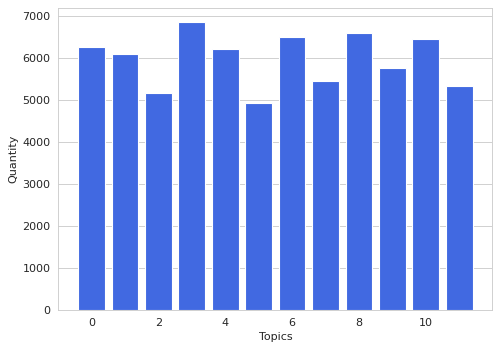

In [ ]:
from collections import Counter
# distribution of documents by topic
def distribution_of_docs_by_topics(LDAmodel):
  topics = []
  for i in range(len(corpus)):
    # find topic that has the highest probability
    topics.append(max(LDAmodel[corpus[i]],key=lambda item:item[1])[0])


  print(Counter(topics))
  df["topics"] = topics

  # set a style
  sns.set_style("whitegrid")

  # create an object 
  fig = plt.figure(figsize=(7, 5), dpi=80)
  ax = fig.subplots()
  ax.grid(axis='x')

  # build a graph
  plt.bar(Counter(topics).keys(), Counter(topics).values(), color = "royalblue")
  plt.xlabel("Topics")
  plt.ylabel("Quantity")

distribution_of_docs_by_topics(converted_model)

In [ ]:
# select the most important 20 words
all_topics = converted_model.show_topics(num_topics=12, num_words=20, formatted = False)
topics_words = [(topic[0], [word[0] for word in topic[1]]) for topic in all_topics]
for topic,words in topics_words:
    print("topic " + str(topic) + " : " + ", ".join(words))

topic 0 : vaccine, control, world, fear, government, order, change, global, human, people, system, experimental, mass, population, mind, propaganda, climate, push, agenda, passport
topic 1 : money, business, government, make, making, made, health, lockdown, million, public, mark, care, paid, small, open, billion, give, pharma, politician, company
topic 2 : fauci, gate, bill, scam, crime, wuhan, virus, humanity, nuremberg, fraud, criminal, coming, evil, 2, biggest, history, trial, research, crimesagainsthumanity, involved
topic 3 : conspiracy, fact, video, watch, doctor, anti, science, read, truth, theory, call, word, real, wrong, show, news, post, called, full, listen
topic 4 : covid, 19, vaccine, agenda, freedom, hoax, coronavirus, truth, lockdown, canada, wakeup, 1984, 21, greatreset, psyop, tyranny, pandemic, 2021, covidiots, justsayno
topic 5 : medium, people, skin, hand, fake, light, pointing, index, tone, wake, news, make, government, sheep, woman, point, sense, good, backhand, d

In [ ]:
# ddistribution of words in each topic and proximity of each topic to each other
pyLDAvis.enable_notebook()
vis = prepare(converted_model, corpus, id2word, sort_topics=False)
vis


/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
0      0.083865  0.076220       1        1  8.571671
1     -0.018189 -0.117832       2        1  8.469462
2      0.200118 -0.222508       3        1  7.983374
3      0.037705 -0.038670       4        1  8.439978
4      0.272830  0.211872       5        1  8.304399
5     -0.191356  0.030632       6        1  8.170915
6     -0.213025  0.101184       7        1  8.468329
7     -0.007692  0.046555       8        1  8.187725
8     -0.254188  0.045935       9        1  8.628125
9      0.062716 -0.234827      10        1  8.300599
10     0.099084  0.240499      11        1  8.553103
11    -0.071868 -0.139060      12        1  7.922320, topic_info=          Term          Freq         Total Category  logprob  loglift
56       covid  14889.000000  14889.000000  Default  30.0000  30.0000
227       face   7982.000000   7982.000000  Default  29.0000  29.0000
229       mask   5326.000000   5326.000000  Default  28.0000  28.0000
284     people  12040.000000  12040.000000  Default  27.0000  27.0000
112    vaccine   6787.000000   6787.000000  Default  26.0000  26.0000
...        ...           ...           ...      ...      ...      ...
305      heart    334.395700    614.074017  Topic12  -5.3148   1.9277
624    medical    364.453730   1056.798848  Topic12  -5.2287   1.4709
143      gonna    268.017522    516.725675  Topic12  -5.5360   1.8790
1391  bullshit    309.347321   1160.425938  Topic12  -5.3926   1.2134
550       show    225.435302   1159.982872  Topic12  -5.7090   0.8974

[911 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
616       8  0.843704       1804
269       5  1.000044         19
205       5  0.999406       1984
705       5  1.001135       19uk
706       5  1.000755  19vaccine
...     ...       ...        ...
10        9  0.464669       year
10       11  0.275285       year
235       7  1.006287   youngest
336       4  0.998653    youtube
727      11  0.991858       zinc

[1229 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])